In [1]:
!nvidia-smi

Fri Jan  5 09:17:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8               7W /  95W |    168MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
#pip install pillow

In [5]:
# Important library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
#from keras.preprocessing import image
import keras.utils as image
from keras.utils import load_img, img_to_array

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

## 2. Creating labels dataset for every photo

In [6]:
# Training df
emotions_train = []
size_train = [3994, 4096, 7214, 4964, 4829, 3170]
emotion_str = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']
emotion_category = [['Angry'], ['Fear'], ['Happy'], ['Neutral'], ['Sad'], ['Suprise']]


In [7]:
# Cicle for labels and id's
for i in range(0, 6):
  for j in range(0, size_train[i]):
    if j == 0:
      emotions_train.append(list([emotion_str[i], emotion_str[i]]))
    else:
      emotions_train.append(list([emotion_str[i] + '-' + str(j), emotion_str[i]]))
    #emotion_category[i].append(emotion_str[i])

print(emotions_train)
#print(emotion_category)

[['Angry', 'Angry'], ['Angry-1', 'Angry'], ['Angry-2', 'Angry'], ['Angry-3', 'Angry'], ['Angry-4', 'Angry'], ['Angry-5', 'Angry'], ['Angry-6', 'Angry'], ['Angry-7', 'Angry'], ['Angry-8', 'Angry'], ['Angry-9', 'Angry'], ['Angry-10', 'Angry'], ['Angry-11', 'Angry'], ['Angry-12', 'Angry'], ['Angry-13', 'Angry'], ['Angry-14', 'Angry'], ['Angry-15', 'Angry'], ['Angry-16', 'Angry'], ['Angry-17', 'Angry'], ['Angry-18', 'Angry'], ['Angry-19', 'Angry'], ['Angry-20', 'Angry'], ['Angry-21', 'Angry'], ['Angry-22', 'Angry'], ['Angry-23', 'Angry'], ['Angry-24', 'Angry'], ['Angry-25', 'Angry'], ['Angry-26', 'Angry'], ['Angry-27', 'Angry'], ['Angry-28', 'Angry'], ['Angry-29', 'Angry'], ['Angry-30', 'Angry'], ['Angry-31', 'Angry'], ['Angry-32', 'Angry'], ['Angry-33', 'Angry'], ['Angry-34', 'Angry'], ['Angry-35', 'Angry'], ['Angry-36', 'Angry'], ['Angry-37', 'Angry'], ['Angry-38', 'Angry'], ['Angry-39', 'Angry'], ['Angry-40', 'Angry'], ['Angry-41', 'Angry'], ['Angry-42', 'Angry'], ['Angry-43', 'Angry'],

In [8]:
# Test df
emotions_test = []
size_test = [957, 1023, 1773, 1232, 1246, 831]
emotion_str = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']
emotion_category_test = [['Angry'], ['Fear'], ['Happy'], ['Neutral'], ['Sad'], ['Suprise']]


In [9]:
# Cicle for labels and id's
for i in range(0, 6):
  for j in range(0, size_test[i]):
    if j == 0:
      emotions_test.append(list([emotion_str[i], emotion_str[i]]))
    else:
      emotions_test.append(list([emotion_str[i] + '-' + str(j), emotion_str[i]]))
    #emotion_category[i].append(emotion_str[i])

print(emotions_train)
#print(emotion_category)

[['Angry', 'Angry'], ['Angry-1', 'Angry'], ['Angry-2', 'Angry'], ['Angry-3', 'Angry'], ['Angry-4', 'Angry'], ['Angry-5', 'Angry'], ['Angry-6', 'Angry'], ['Angry-7', 'Angry'], ['Angry-8', 'Angry'], ['Angry-9', 'Angry'], ['Angry-10', 'Angry'], ['Angry-11', 'Angry'], ['Angry-12', 'Angry'], ['Angry-13', 'Angry'], ['Angry-14', 'Angry'], ['Angry-15', 'Angry'], ['Angry-16', 'Angry'], ['Angry-17', 'Angry'], ['Angry-18', 'Angry'], ['Angry-19', 'Angry'], ['Angry-20', 'Angry'], ['Angry-21', 'Angry'], ['Angry-22', 'Angry'], ['Angry-23', 'Angry'], ['Angry-24', 'Angry'], ['Angry-25', 'Angry'], ['Angry-26', 'Angry'], ['Angry-27', 'Angry'], ['Angry-28', 'Angry'], ['Angry-29', 'Angry'], ['Angry-30', 'Angry'], ['Angry-31', 'Angry'], ['Angry-32', 'Angry'], ['Angry-33', 'Angry'], ['Angry-34', 'Angry'], ['Angry-35', 'Angry'], ['Angry-36', 'Angry'], ['Angry-37', 'Angry'], ['Angry-38', 'Angry'], ['Angry-39', 'Angry'], ['Angry-40', 'Angry'], ['Angry-41', 'Angry'], ['Angry-42', 'Angry'], ['Angry-43', 'Angry'],

In [10]:
print(len(emotions_train[0]), ',', len(emotion_category[0]))

2 , 1


In [11]:
# Create dataframe train
df_train = pd.DataFrame(emotions_train)
df_train.columns = ['name', 'category']
df_train

,name,category
0,Angry,Angry
1,Angry-1,Angry
2,Angry-2,Angry
3,Angry-3,Angry
4,Angry-4,Angry
...,...,...
28262,Suprise-3165,Suprise
28263,Suprise-3166,Suprise
28264,Suprise-3167,Suprise
28265,Suprise-3168,Suprise


In [12]:
# Count data
df_train.category.value_counts()

Happy      7214
Neutral    4964
Sad        4829
Fear       4096
Angry      3994
Suprise    3170
Name: category, dtype: int64

In [13]:
# Create dataframe
df_test = pd.DataFrame(emotions_test)
df_test.columns = ['name', 'category']
df_test

,name,category
0,Angry,Angry
1,Angry-1,Angry
2,Angry-2,Angry
3,Angry-3,Angry
4,Angry-4,Angry
...,...,...
7057,Suprise-826,Suprise
7058,Suprise-827,Suprise
7059,Suprise-828,Suprise
7060,Suprise-829,Suprise


In [14]:
df_test.category.value_counts()

Happy      1773
Sad        1246
Neutral    1232
Fear       1023
Angry       957
Suprise     831
Name: category, dtype: int64

In [27]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(df_train), 48, 48, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(df_train['category'], classes = emotion_str)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(df_train))):
    img = load_img('Training/' + str(df_train.iloc[i, 1]) + '/' + str(df_train.iloc[i, 0]) + '.jpg', target_size=(48, 48))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|███████████████████████████████████████████████████████████████████████████| 28267/28267 [03:14<00:00, 145.04it/s]


Train Images shape:  (28267, 48, 48, 3)  size: 195,381,504
One-hot encoded output shape:  (28267, 6)  size: 169,602


In [28]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (48,48,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
#model.add(MaxPool2D(pool_size=(2,2)))



#model.add(Conv2D(filters = 32,kernel_size = 3, activation ='relu', input_shape = (48,48,1)))
#model.add(MaxPool2D(pool_size=(2,2), strides = 2))

#model.add(Conv2D(filters = 32,kernel_size = 3, activation ='relu', kernel_regularizer = 'l2'))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
#model.add(MaxPool2D(pool_size=(2,2), strides = 2))

#odel.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
#model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
#model.add(Dense(1, activation = "sigmoid"))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(emotion_str), activation = "softmax"))

#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accurancy'])
          
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        4864      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 16)          25104     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 16)        

In [29]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [30]:
# Training the model
epochs = 150
batch_size = 64

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val))

Epoch 1/150
318/318 [==============================] - 3s 7ms/step - loss: 3.4721 - accuracy: 0.2520 - val_loss: 2.9727 - val_accuracy: 0.2636
Epoch 2/150
318/318 [==============================] - 2s 7ms/step - loss: 2.6792 - accuracy: 0.2556 - val_loss: 2.4317 - val_accuracy: 0.2728
Epoch 3/150
318/318 [==============================] - 2s 7ms/step - loss: 2.2623 - accuracy: 0.2861 - val_loss: 2.1092 - val_accuracy: 0.3257
Epoch 4/150
318/318 [==============================] - 2s 6ms/step - loss: 2.0152 - accuracy: 0.3392 - val_loss: 1.9379 - val_accuracy: 0.3451
Epoch 5/150
318/318 [==============================] - 2s 6ms/step - loss: 1.8917 - accuracy: 0.3604 - val_loss: 1.8539 - val_accuracy: 0.3756
Epoch 6/150
318/318 [==============================] - 2s 6ms/step - loss: 1.8210 - accuracy: 0.3695 - val_loss: 1.7953 - val_accuracy: 0.3821
Epoch 7/150
318/318 [==============================] - 2s 6ms/step - loss: 1.7724 - accuracy: 0.3819 - val_loss: 1.7557 - val_accuracy: 0.3872

Epoch 58/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4349 - accuracy: 0.4884 - val_loss: 1.4877 - val_accuracy: 0.4695
Epoch 59/150
318/318 [==============================] - 2s 7ms/step - loss: 1.4313 - accuracy: 0.4894 - val_loss: 1.4871 - val_accuracy: 0.4625
Epoch 60/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4287 - accuracy: 0.4895 - val_loss: 1.5105 - val_accuracy: 0.4560
Epoch 61/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4255 - accuracy: 0.4924 - val_loss: 1.4822 - val_accuracy: 0.4648
Epoch 62/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4267 - accuracy: 0.4873 - val_loss: 1.5124 - val_accuracy: 0.4544
Epoch 63/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4239 - accuracy: 0.4910 - val_loss: 1.4764 - val_accuracy: 0.4697
Epoch 64/150
318/318 [==============================] - 2s 6ms/step - loss: 1.4180 - accuracy: 0.4937 - val_loss: 1.4849 - val_accuracy:

Epoch 115/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3175 - accuracy: 0.5417 - val_loss: 1.4613 - val_accuracy: 0.4837
Epoch 116/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3199 - accuracy: 0.5372 - val_loss: 1.4569 - val_accuracy: 0.4868
Epoch 117/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3221 - accuracy: 0.5383 - val_loss: 1.4598 - val_accuracy: 0.4912
Epoch 118/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3118 - accuracy: 0.5440 - val_loss: 1.4534 - val_accuracy: 0.4851
Epoch 119/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3121 - accuracy: 0.5436 - val_loss: 1.4538 - val_accuracy: 0.4866
Epoch 120/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3122 - accuracy: 0.5430 - val_loss: 1.4517 - val_accuracy: 0.4957
Epoch 121/150
318/318 [==============================] - 2s 6ms/step - loss: 1.3078 - accuracy: 0.5473 - val_loss: 1.4482 - val_ac

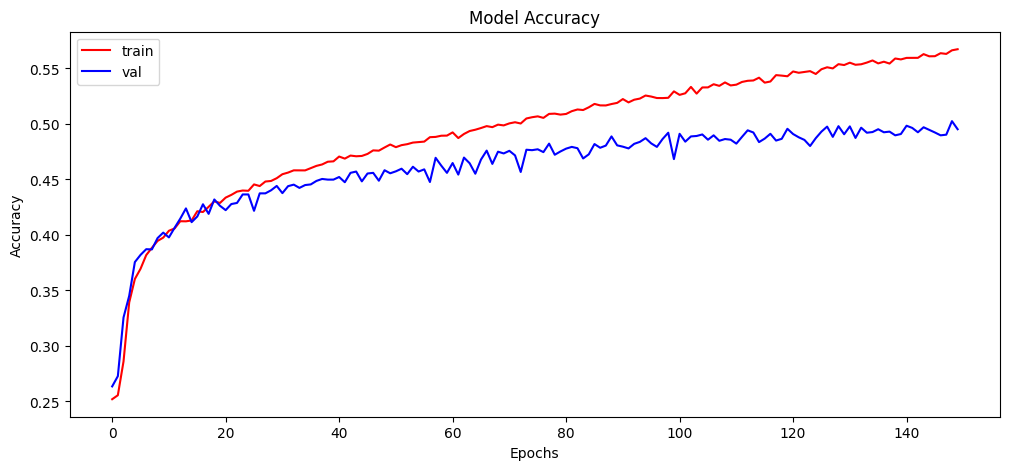

In [31]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [32]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

89/89 [==============================] - 0s 3ms/step - loss: 1.5050 - accuracy: 0.4726
Accuracy over the test set: 
  47.26 %


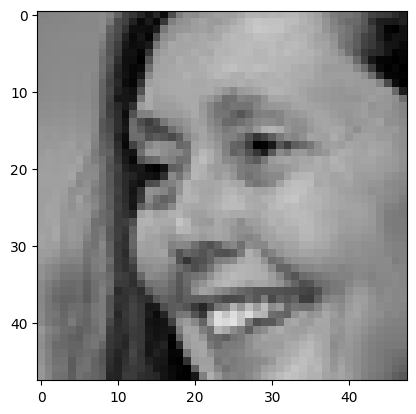

Originally :  Angry
Predicted :  Angry


In [33]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",df_train['category'][np.argmax(Y_test[1])])
print("Predicted : ",df_train['category'][np.argmax(Y_pred[1])])